In [11]:
from google.colab import files
uploaded = files.upload()

Saving Flower_CNN_Model.h5 to Flower_CNN_Model.h5


In [12]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
from google.colab import drive
import os

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the folder path inside Google Drive
folder_path = "/content/drive/My Drive/ML Datasets/PlantVillage"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
files = os.listdir(folder_path)

# Print the list of files
print("Files in the folder:", files)

Files in the folder: ['Pepper__bell___Bacterial_spot', 'Potato___healthy', 'Potato___Late_blight', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Pepper__bell___healthy', 'Potato___Early_blight']


In [15]:
count = 0
# List all subdirectories in the main folder
dirs = os.listdir(folder_path)

for dir in dirs:
    dir_path = os.path.join(folder_path, dir)

    if os.path.isdir(dir_path):
        files = os.listdir(dir_path)
        print(f"{dir} Folder has {len(files)} Images")
        count += len(files)

print(f"Images Folder has {count} Images")

Pepper__bell___Bacterial_spot Folder has 642 Images
Potato___healthy Folder has 152 Images
Potato___Late_blight Folder has 1000 Images
Tomato__Target_Spot Folder has 1405 Images
Tomato__Tomato_mosaic_virus Folder has 373 Images
Tomato__Tomato_YellowLeaf__Curl_Virus Folder has 3209 Images
Tomato_Bacterial_spot Folder has 2147 Images
Tomato_Early_blight Folder has 1000 Images
Tomato_healthy Folder has 1591 Images
Tomato_Late_blight Folder has 1909 Images
Tomato_Leaf_Mold Folder has 952 Images
Tomato_Septoria_leaf_spot Folder has 1801 Images
Tomato_Spider_mites_Two_spotted_spider_mite Folder has 1676 Images
Pepper__bell___healthy Folder has 1478 Images
Potato___Early_blight Folder has 1000 Images
Images Folder has 20335 Images


In [16]:
base_dir = folder_path #"/content/drive/My Drive/ML Datasets/PlantVillage"
batch = 32

In [17]:
img_height, img_width = 180, 180
batch_size = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [18]:
# Training data generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 16272 images belonging to 15 classes.


In [19]:
# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4062 images belonging to 15 classes.


In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input

# Load the pretrained model
model = load_model('Flower_CNN_Model.h5')

In [21]:
# Freeze the first 8 layers
for layer in model.layers[:8]:
    layer.trainable = False

In [22]:
import tensorflow as tf
_ = model(tf.keras.Input(shape=(180, 180, 3)))
# Get the output of the 2nd last layer
x = model.layers[-2].output

# Add a new output layer
new_output = Dense(train_generator.num_classes, activation='softmax')(x)

In [28]:
fine_tuned_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Create the new model
fine_tuned_model = Model(inputs=model.input, outputs=new_output)

ValueError: The name "input_layer" is used 2 times in the model. All operation names should be unique.

In [25]:
from tensorflow.keras.optimizers import Adam

fine_tuned_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [1]:
epochs = 15

history = fine_tuned_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

NameError: name 'fine_tuned_model' is not defined

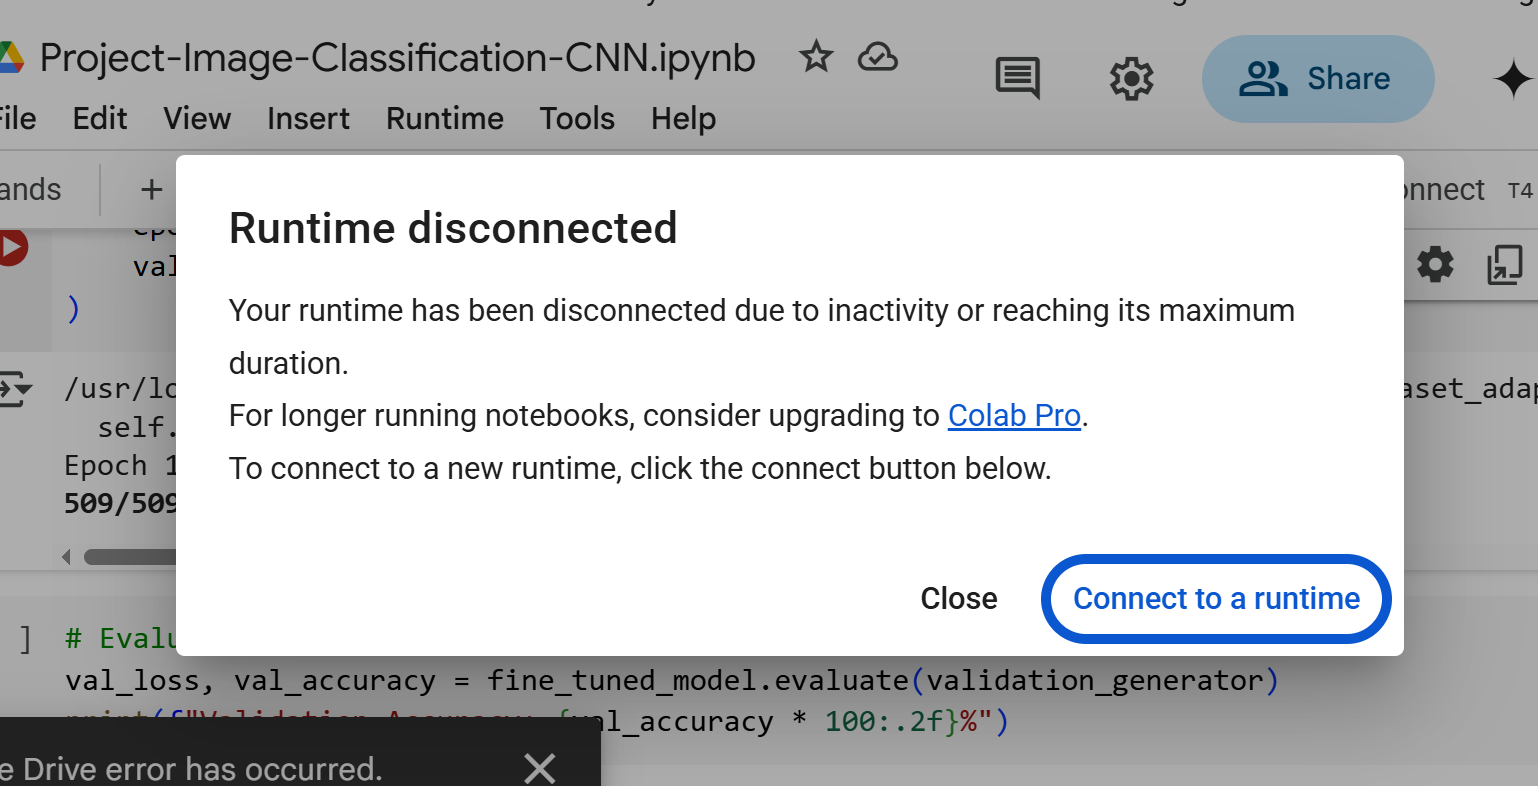

In [ ]:
# Evaluate on the validation set
val_loss, val_accuracy = fine_tuned_model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
# Save the fine-tuned model
fine_tuned_model.save('plant_disease_cnn_model.h5')
